### Overview

In [1]:
## The objective of this analysis is the evaluation of the sales of Electric Vehicles (EV's) in the state of Washington.
## Sales sensitiviy analyses are done along several dimensions including:
    ## Battery Range
    ## Vehicle Price
    ## Population
    ## Distance of Travel (Surface Area of Vehicle Home Location)
    ## Availability of Charging Stations outside the home
    
## More focused analysis will be done on the top five EV makes that currently hold over 80% of the market share

## Recommendations will be made to guide further R&D and Product Development decisions regarding features vs range.

### Sources of Data

In [2]:
## Electric Vehicle dataset was obtained at data.gov: https://catalog.data.gov/dataset/electric-vehicle-population-data
## Electric Vehicle Charging Stations data: https://chargehub.com/en/countries/united-states/washington/seattle.html
## Electric Rates Per City in Washington State: https://www.electricitylocal.com/states/washington
## Washington State City and County Demographics: https://www.washington-demographics.com/counties_by_population

### Electric Vehicles Categories

In [3]:
## There are two types of electric vehicles captured in the dataset from data.gov.  They are:
    ## Battery Electric Vehicles - entirely fueled by an battery banks
    ## Plug-in Hybrid Electric Vehicle - fueled by batteries and an additional fuel (gasoline, diesel, ethanol)
    
## This project will focused on BEV's although some comparisons will be made with PHEV data for context definition

### Dependencies and Set up

In [12]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


In [13]:
# Reading the datafiles
EV_raw_data = pd.read_csv("Wash_State_EV_PHEV_Data.csv")
County_demo_data = pd.read_csv("Wash_State_County_Demo_Data.csv")

In [14]:
EV_raw_data = pd.DataFrame(EV_raw_data)
EV_raw_data.head()

,City,County,ZIP Code,VIN,Model_Year,Make,Model,EV_Type,Electric_Range,Base_MSRP,Legislative_District,DOL_ID,Vehicle_Location
0,AUBURN,King,98001,5YJYGDEEXL,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),315.0,42190.0,30.0,114288233.0,POINT (-122.266685 47.308313)
1,AUBURN,King,98001,WVWKR7AU1K,2019,VOLKSWAGEN,E-GOLF,Battery Electric Vehicle (BEV),125.0,32790.0,47.0,331142717.0,POINT (-122.266685 47.308313)
2,AUBURN,King,98001,5YJYGDEE1L,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),315.0,42190.0,47.0,112961761.0,POINT (-122.266685 47.308313)
3,AUBURN,King,98001,1N4AZ1BP2L,2020,NISSAN,LEAF,Battery Electric Vehicle (BEV),149.0,31620.0,30.0,132473834.0,POINT (-122.266685 47.308313)
4,AUBURN,King,98001,5YJSA1H11E,2014,TESLA,MODEL S,Battery Electric Vehicle (BEV),208.0,69900.0,30.0,2267016.0,POINT (-122.266685 47.308313)


In [15]:
# Release unneeded columns from EV_raw_data

In [16]:
EV_raw_data.drop(["VIN","Legislative_District","DOL_ID","Vehicle_Location"],axis=1,inplace=True)

In [17]:
EV_raw_data

,City,County,ZIP Code,Model_Year,Make,Model,EV_Type,Electric_Range,Base_MSRP
0,AUBURN,King,98001,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),315.0,42190.0
1,AUBURN,King,98001,2019,VOLKSWAGEN,E-GOLF,Battery Electric Vehicle (BEV),125.0,32790.0
2,AUBURN,King,98001,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),315.0,42190.0
3,AUBURN,King,98001,2020,NISSAN,LEAF,Battery Electric Vehicle (BEV),149.0,31620.0
4,AUBURN,King,98001,2014,TESLA,MODEL S,Battery Electric Vehicle (BEV),208.0,69900.0
...,...,...,...,...,...,...,...,...,...
64427,CLARKSTON,Asotin,99403,2016,HYUNDAI,SONATA PLUG-IN HYBRID,Plug-in Hybrid Electric Vehicle (PHEV),27.0,34600.0
64428,CLARKSTON,Asotin,99403,2012,TOYOTA,PRIUS,Plug-in Hybrid Electric Vehicle (PHEV),6.0,32000.0
64429,CLARKSTON,Asotin,99403,2020,TOYOTA,PRIUS PRIME,Plug-in Hybrid Electric Vehicle (PHEV),25.0,27600.0
64430,CLARKSTON,Asotin,99403,2014,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),38.0,34185.0


In [18]:
# Compare Cars by Type of Electric Vehicle
    # BoxPlot of Range
    # BoxPlot of Price

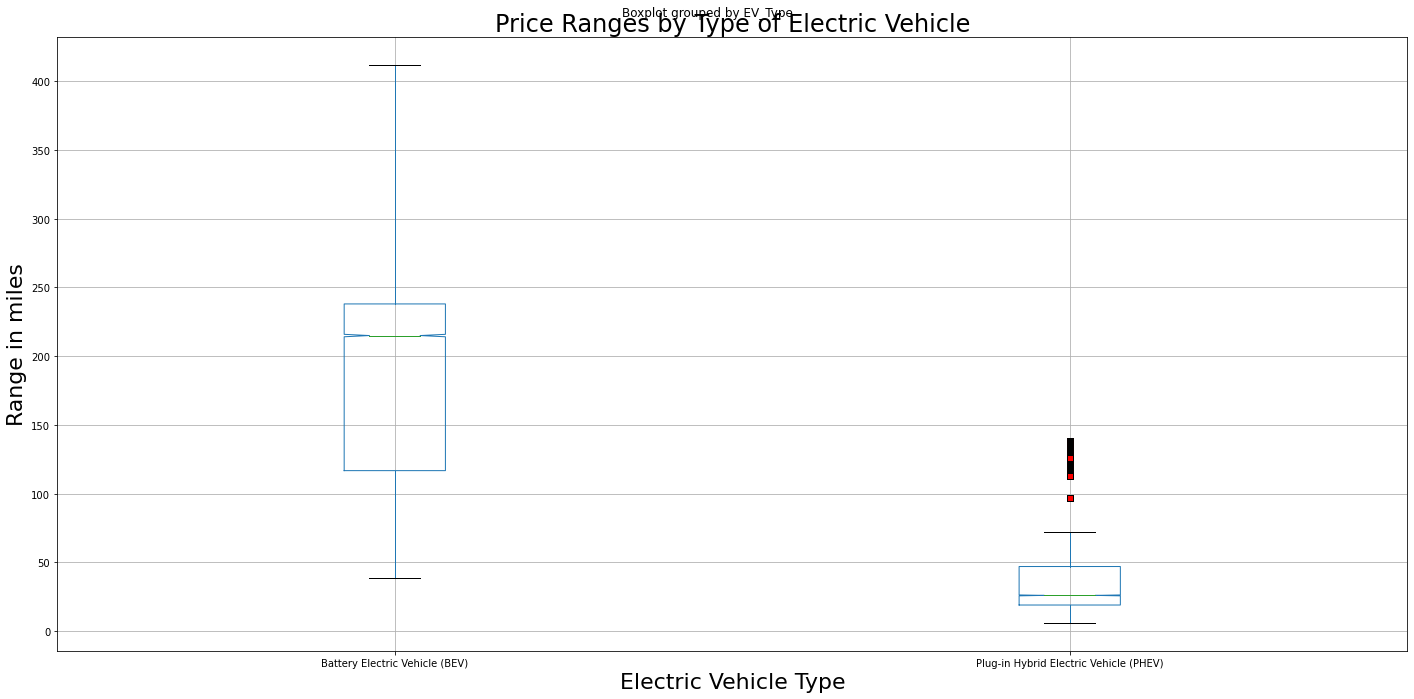

In [27]:
# BoxPlot of Driving Range Based on Vehicle Type

red_square = dict(markerfacecolor = 'r', marker ='s')

EV_raw_data.boxplot("Electric_Range", by="EV_Type", figsize = (20,10), notch = True, flierprops = red_square)

plt.title("Driving Ranges by Type of Electric Vehicle",fontdict ={"fontsize":24})
plt.xlabel("Electric Vehicle Type", fontdict={"fontsize":22})
plt.ylabel("Range in miles", fontdict={"fontsize":22})
plt.tight_layout(pad = 2.0, w_pad = 1.5, h_pad = 2.0)

plt.show()


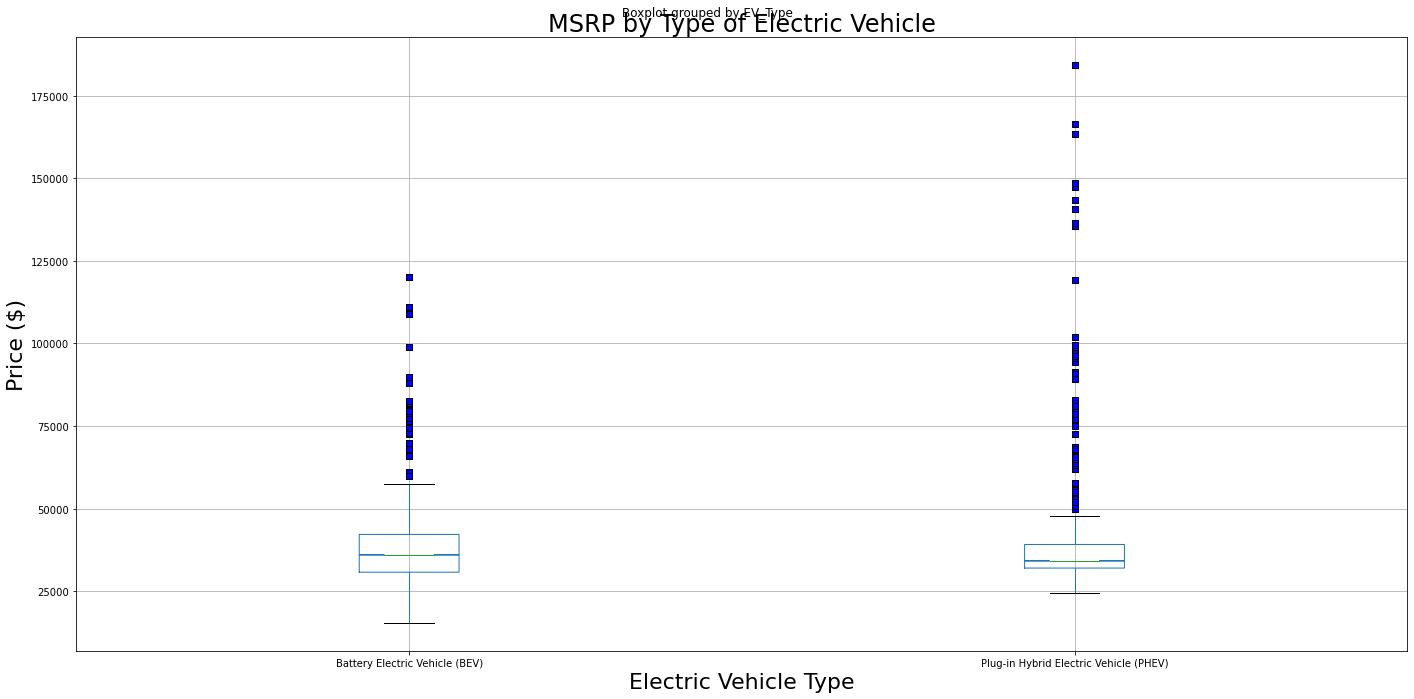

In [29]:
# BoxPlot of Price Range Based on Vehicle Type

blue_square = dict(markerfacecolor = 'b', marker ='s')

EV_raw_data.boxplot("Base_MSRP", by="EV_Type", figsize = (20,10), notch = True, flierprops = blue_square)

plt.title("MSRP by Type of Electric Vehicle",fontdict ={"fontsize":24})
plt.xlabel("Electric Vehicle Type", fontdict={"fontsize":22})
plt.ylabel("Price ($)", fontdict={"fontsize":22})
plt.tight_layout(pad = 2.0, w_pad = 1.5, h_pad = 2.0)

plt.show()


In [ ]:
# Dependencies and Setup


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [ ]:
pd.options.display.float_format = "{:,.3f}".format

In [ ]:
# This program examines the eficacy in treating SCC tumors using several drug treatments including Capomulin
# This analysis was completed by F. A. Barillas

In [ ]:
# Verifiying Dataframe structures
mouse_metadata.head()


In [ ]:
mouse_metadata.columns = mouse_metadata.columns.str.replace(" ","_")
mouse_metadata.columns

In [ ]:
study_results.columns = study_results.columns.str.replace(" ","_")
study_results.columns

In [ ]:
# Checking the number of mice.
len(mouse_metadata.Mouse_ID)

In [ ]:
study_results.shape

In [ ]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
study_results.duplicated(subset=['Mouse_ID','Timepoint']).sum()


In [ ]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_results = study_results.loc[study_results.duplicated(subset=['Mouse_ID','Timepoint'])]
duplicated_results

In [ ]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_results = study_results.drop_duplicates(subset=['Mouse_ID','Timepoint'])
clean_study_results

In [ ]:
# Checking the number of mice in the clean DataFrame.
clean_study_results.duplicated(subset=['Mouse_ID','Timepoint']).sum()

In [ ]:
len(clean_study_results['Mouse_ID'])

In [ ]:
# Merge Mouse Data with Study Data
clean_study_results = pd.merge(mouse_metadata, clean_study_results, how = "left", on = "Mouse_ID")
clean_study_results

# CLEAN STUDY RESULTS DATAFRAME WITHOUT DUPLICATES

In [ ]:
clean_study_results.rename(columns={'Weight_(g)':'Weight_g', 'Tumor_Volume_(mm3)':'Tumor_Volume_mm3'}, inplace =True)
clean_study_results

In [ ]:
male_mice = (clean_study_results.Sex =="Male").sum()
male_mice


In [ ]:
female_mice = (clean_study_results.Sex =="Female").sum()
female_mice


## Summary Statistics

In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for 
# each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.


In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for 
# each regimen

In [ ]:
# Undertanding Trials Per Regimen
Trials_Per_Regimen = clean_study_results.groupby('Drug_Regimen').Drug_Regimen.count()


In [ ]:
Mean_Tumor_Volume = clean_study_results.groupby('Drug_Regimen').Tumor_Volume_mm3.mean()


In [ ]:
Median_Tumor_Volume = clean_study_results.groupby('Drug_Regimen').Tumor_Volume_mm3.median()


In [ ]:
Variance_Tumor_Volume = clean_study_results.groupby('Drug_Regimen').Tumor_Volume_mm3.var()


In [ ]:
StDev_Tumor_Volume = clean_study_results.groupby('Drug_Regimen').Tumor_Volume_mm3.std()


In [ ]:
SEM_Tumor_Volume = clean_study_results.groupby('Drug_Regimen').Tumor_Volume_mm3.sem()


In [ ]:
# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_df=pd.concat([Trials_Per_Regimen, Mean_Tumor_Volume, Median_Tumor_Volume, Variance_Tumor_Volume, StDev_Tumor_Volume, SEM_Tumor_Volume], axis =1)
summary_stats_df.columns=['Trials','Average','Median','Variance','StDev','SEM']              


In [ ]:
summary_stats_df.reset_index(inplace = True)

# SUMMARY STATISTICS BY DRUG REGIMEN

In [ ]:
summary_stats_df

## Bar and Pie Charts

In [ ]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.



In [ ]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
summary_stats_df.sort_values('Trials', inplace = True, ascending = False)

x_axis = summary_stats_df['Drug_Regimen']
y_values=summary_stats_df['Trials']

tick_locations = [value for value in x_axis]

fig1 = plt.figure(figsize =(12,6))

plt.bar(x_axis, y_values, color = 'b', alpha = 0.75, align = "center", width = 0.5)
plt.title("Trials Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Trials")

plt.xlim(-0.5, len(x_axis)-0.5)

plt.grid(color='k', alpha = 0.15)
plt.tight_layout(pad=0.8, w_pad=1.4, h_pad=1.0)


In [ ]:
categories = [male_mice,female_mice]
categories

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
fig2 = plt.figure()
fig2.suptitle('Mice Gender Split', fontsize = 14, fontweight = 'bold')


labels = ["Male Mice", "Female Mice" ]
categories = [male_mice, female_mice]
colors = ["y","c"]
explode = (0.1,0)

plt.pie(categories, explode, labels, colors, autopct='%1.1f%%', shadow= True, startangle = 45)
plt.axis("Equal")
plt.tight_layout()
plt.show()


In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

Capomulin_df = clean_study_results[clean_study_results.Drug_Regimen == "Capomulin"]
Ramicane_df = clean_study_results[clean_study_results.Drug_Regimen == "Ramicane"]
Infubinol_df = clean_study_results[clean_study_results.Drug_Regimen == "Infubinol"]
Ceftamin_df = clean_study_results[clean_study_results.Drug_Regimen == "Ceftamin"]

In [ ]:
# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
